In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,Math

# Renumbering nodes 1,2,3 as 3,1,2 respectively

In [2]:
display(Math('All\space distances\space are\space in\space mm\space and\space loads\space in\space kN.'))
display(Math('Areas\space are\space in\space mm^{2}\space and\space so\space on.'))
L1,L2,P,k,E,I=input("Enter the values of L1, L2,P, k (in kN/mm), E (in GPa) and I  in the same order separated by commas\n").split(',')
L1,L2,P,k,E,I=float(L1),float(L2),float(P),float(k),float(E),float(I)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Enter the values of L1, L2,P, k (in kN/mm), E (in GPa) and I  in the same order separated by commas
3000,3000,10,5,70,40000000


# Element stiffness matrices

In [3]:
#Element 1                  (connecting nodes 3 and 1)
k1=np.array([[12*E*I/(L1**3),6*E*I/(L1**2),-12*E*I/(L1**3),6*E*I/(L1**2)],[6*E*I/(L1**2),4*E*I/L1,-6*E*I/(L1**2),2*E*I/(L1)],[-12*E*I/(L1**3),-6*E*I/(L1**2),12*E*I/(L1**3),-6*E*I/(L1**2)],[6*E*I/(L1**2),2*E*I/(L1),-6*E*I/(L1**2),4*E*I/(L1)]])

As_1=[5,6,3,1]

#Element 2      (connecting nodes 1 and 2)
k2=np.array([[12*E*I/(L2**3),6*E*I/(L2**2),-12*E*I/(L2**3),6*E*I/(L2**2)],[6*E*I/(L2**2),4*E*I/L2,-6*E*I/(L2**2),2*E*I/(L2)],[-12*E*I/(L2**3),-6*E*I/(L2**2),12*E*I/(L2**3),-6*E*I/(L2**2)],[6*E*I/(L2**2),2*E*I/(L2),-6*E*I/(L2**2),4*E*I/(L2)]])

As_2=[3,1,4,2]


# Total structure stiffness matrix

In [8]:
k_com=[k1,k2]
As_com=[As_1,As_2]

Kts=np.zeros([6,6])
for i in range(2):       # for 2 elements
    for j in range(4):   # both 4s for member dofs          
        for k in range(4):
            Kts[As_com[i][j]-1][As_com[i][k]-1]+=k_com[i][j][k] 
            
# Correction for renumbering
r=[4,6,3,5,1,2]

Kts_actual=np.zeros([6,6])

for i in range(6):
    for j in range(6):
        Kts_actual[r[i]-1][r[j]-1]+=Kts[i][j]

display(Math('K_{TS}\space(in\space kN/mm)=%s'%(sym.latex(sym.sympify(Kts_actual))))) 

<IPython.core.display.Math object>

# Computing F, Kpp,Kpx,Kxp and Kxx

In [45]:
Kpp=Kts[0:2,0:2]
Kpx=Kts[0:2,2:6]
Kxp=Kts[2:6,0:2]
Kxx=Kts[2:6,2:6]

F=np.transpose(np.array([[0,0]]))
Kxp

array([[      0.        ,    1866.66666667],
       [  -1866.66666667,   -1866.66666667],
       [   1866.66666667,       0.        ],
       [1866666.66666667,       0.        ]])

# up, ux and X

In [84]:
x1,x2,x3,x4,up1,up2=sym.symbols('x_1,x_2,x_3,x_4,u_{p1},u_{p2}')
ux=(sym.Matrix([[-x1/5,0,0,0]])).T
X=(sym.Matrix([[x1-P,x2,x3,x4]])).T
up=(sym.Matrix([[up1,up2]])).T
RHS1=Kxp*up+Kxx*ux-X
RHS2=Kpp*up+Kpx*ux-F
Ans=sym.nonlinsolve(sym.Matrix((RHS1,RHS2)),(up1,up2,x1,x2,x3,x4))
Ans=list(Ans)
up1,up2,x1,x2,x3,x4=Ans[0][0],Ans[0][1],Ans[0][2],Ans[0][3],Ans[0][4],Ans[0][5]

up=np.array([[up1],[up2]])
X=np.transpose(np.array([[x1,x2,x3,x4]]))

# Rotations

In [81]:
display(Math('Rotations\space at\space joints\space 2,\space and\space 3\space (in\space rad)=%s'%sym.latex(sym.sympify(up))))

<IPython.core.display.Math object>

# Reactions

In [85]:
display(Math('Reactions\space (in\space kN\space and\space kNmm)=%s'%sym.latex(sym.sympify(X))))

<IPython.core.display.Math object>

# Force in spring element

In [88]:
F_s=X[0]
display(Math('Force\space in\space spring=7.785kN (C)'))

<IPython.core.display.Math object>

# SFD

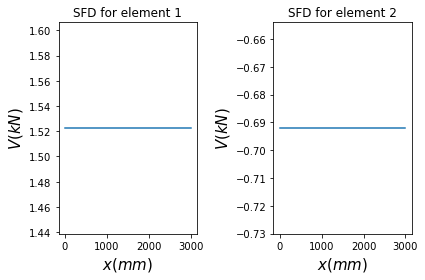

In [92]:
#Element 1
V1=X[2]

#Element 2
V2=-X[1]

plt.subplot(1,2,1)
plt.plot([0,L1],[V1,V1])
plt.title('SFD for element 1')
plt.xlabel('$x(mm)$',fontsize=15)
plt.ylabel('$V(kN)$',fontsize=15)

#Element 2
plt.subplot(1,2,2)
plt.plot([0,L2],[V2,V2])
plt.title('SFD for element 2')
plt.xlabel('$x(mm)$',fontsize=15)
plt.ylabel('$V(kN)$',fontsize=15)
plt.tight_layout()
plt.show()

# BMD

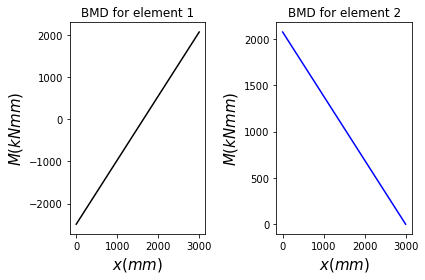

In [94]:
x1_plot=np.linspace(0,L1,20)
x2_plot=np.linspace(0,L2,20)

M1_plot=X[2]*x1_plot-X[3]
M2_plot=X[1]*(L2-x2_plot)

plt.subplot(1,2,1)
plt.plot(x1_plot,M1_plot,'k-')
plt.xlabel('$x(mm)$', fontsize=15)
plt.ylabel('$M(kNmm)$',fontsize=15)
plt.title('BMD for element 1')
plt.subplot(1,2,2)
plt.plot(x2_plot,M2_plot,'b-')
plt.xlabel('$x(mm)$', fontsize=15)
plt.ylabel('$M(kNmm)$',fontsize=15)
plt.title('BMD for element 2')

plt.tight_layout()
plt.show()